Business Scenario

A fintech company provides instant credit limits to customers using a mobile app.
Instead of using complex models, the company wants a similarity-based system that works like:

“Show me customers similar to this new customer, and decide risk accordingly.”

Challenges:

Customers are not easily separable by straight lines

Decisions depend on nearness, not formulas

Feature scale (income vs age) matters a lot

The system must be interactive and explainable
 

•  Load the dataset and explore customer attributes such as:

Age

Income

Loan amount

Credit history

•  Identify which features should be used to measure customer similarity.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [4]:
df.isna().sum

<bound method DataFrame.sum of        person_age  person_income  person_home_ownership  person_emp_length  \
0           False          False                  False              False   
1           False          False                  False              False   
2           False          False                  False              False   
3           False          False                  False              False   
4           False          False                  False              False   
...           ...            ...                    ...                ...   
32576       False          False                  False              False   
32577       False          False                  False              False   
32578       False          False                  False              False   
32579       False          False                  False              False   
32580       False          False                  False              False   

       loan_intent  loan_grade  

In [5]:
features = [
    "person_age",
    "person_income",
    "loan_amnt",
    "loan_percent_income",
    "cb_person_cred_hist_length"
]

X = df[features]
y = df["loan_status"]

In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [8]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=5,
    metric="euclidean"
)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8190885376707073
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5095
           1       0.64      0.38      0.48      1422

    accuracy                           0.82      6517
   macro avg       0.74      0.66      0.69      6517
weighted avg       0.80      0.82      0.80      6517



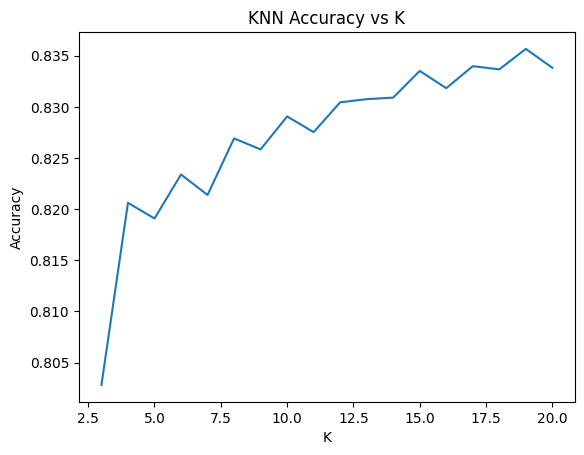

In [11]:
import matplotlib.pyplot as plt

k_values = range(3, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, preds))

plt.plot(k_values, accuracies)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.show()


<Axes: >

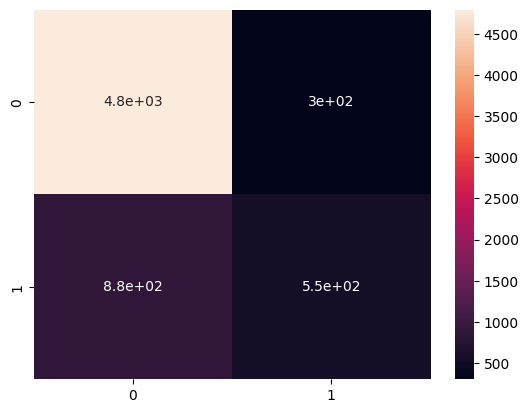

In [12]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)